In [ ]:
# PGP Web of Trust visualization

In [104]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from math import log
import random, logging, sys

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from utils.search import greedy_path, average_greedy_path_length, RoutingError
from utils.misc import shuffle_position_ring, dist_ring, labels_from_attr, switch_nodes, color_path

logger = logging.getLogger('main')
logging.basicConfig(level=logging.INFO, stream=sys.stderr)
plt.rcParams["figure.figsize"] = (30,30)
plt.rcParams["axes.titlesize"] = 50

In [105]:
G = nx.read_graphml('data/2016-12-11.wot.mut.graphml')

In [96]:
size = G.number_of_nodes()

In [97]:
G.number_of_edges()

183842

In [114]:
# average shortest path length = 6.598257086979384

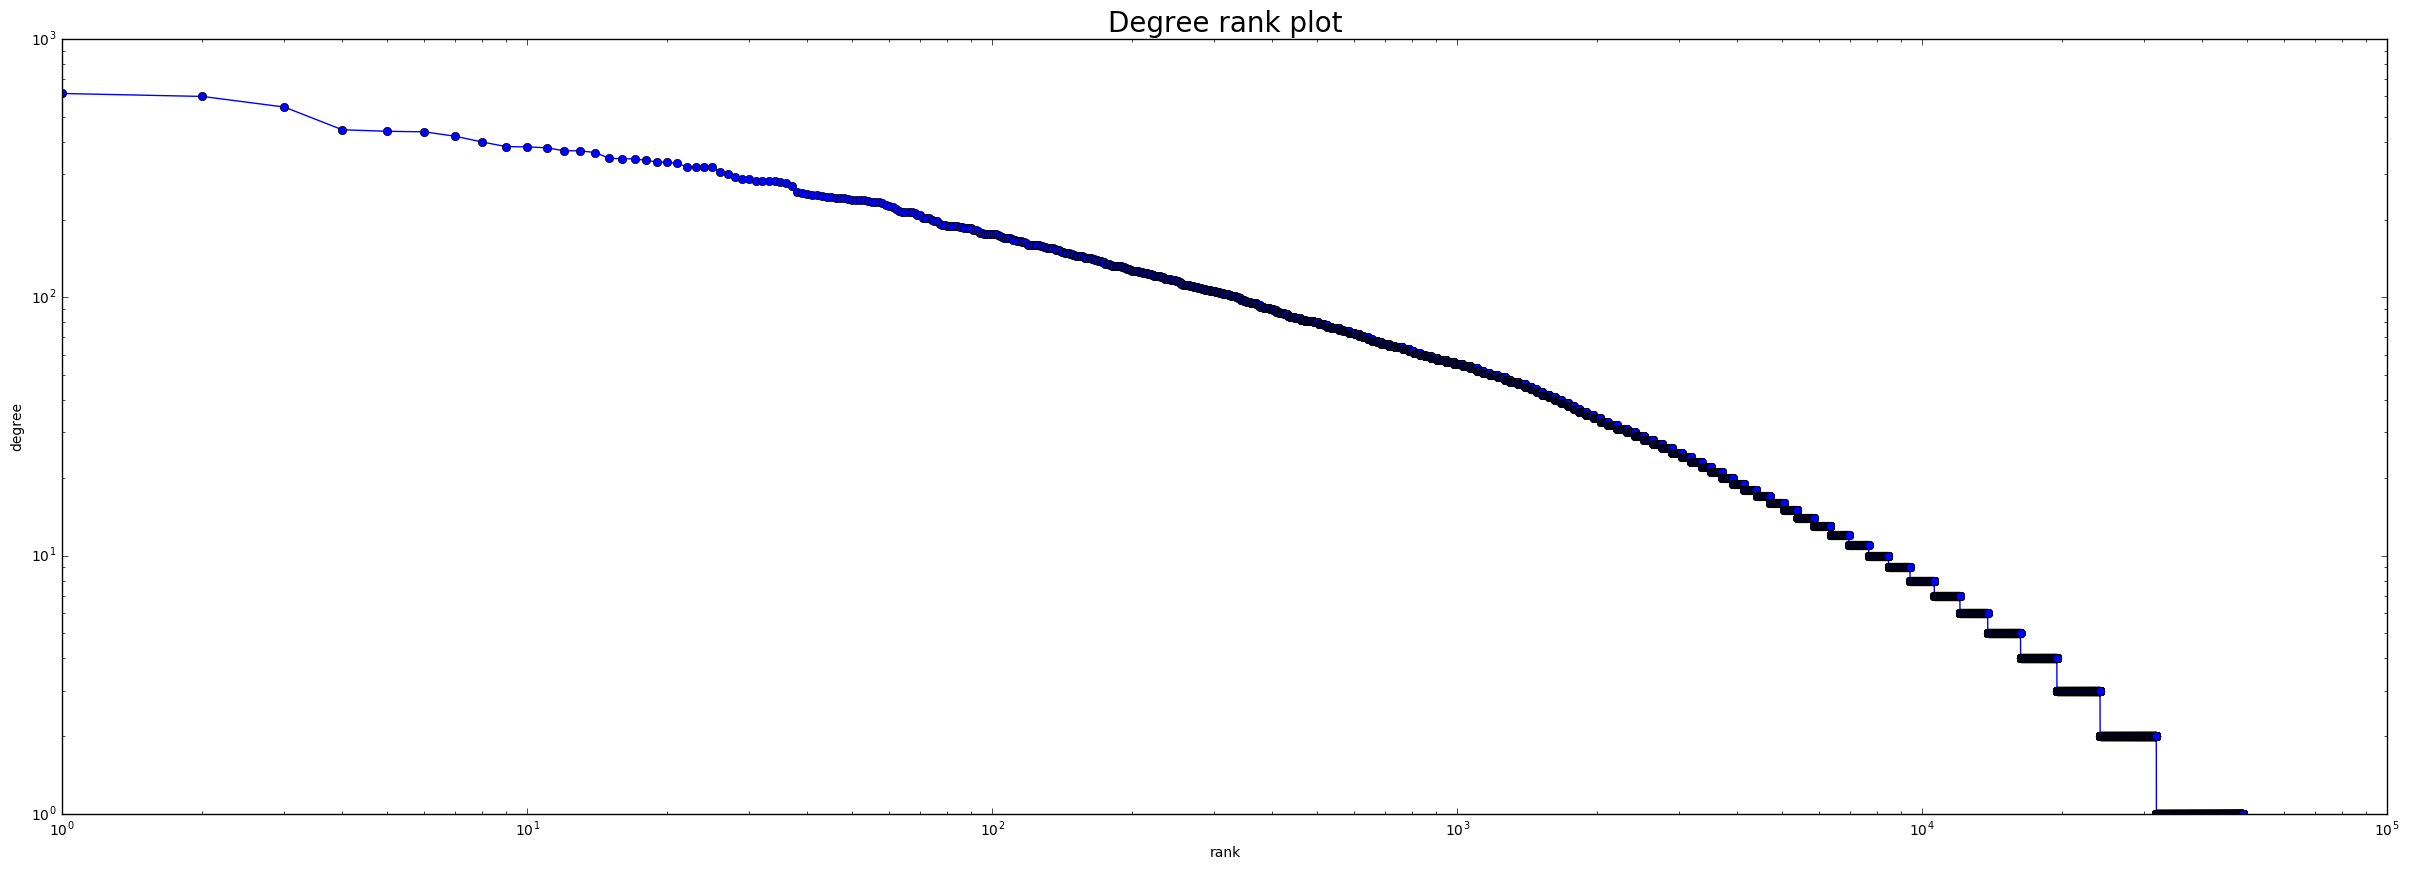

In [106]:
# degree rank
degree_sequence=sorted(nx.degree(G).values(),reverse=True)

plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams["axes.titlesize"] = 20
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()

In [107]:
degree_sequence=sorted(nx.degree(G).values())
hist={}
for d in degree_sequence:
    if d in hist:
        hist[d]+=1
    else:
        hist[d]=1

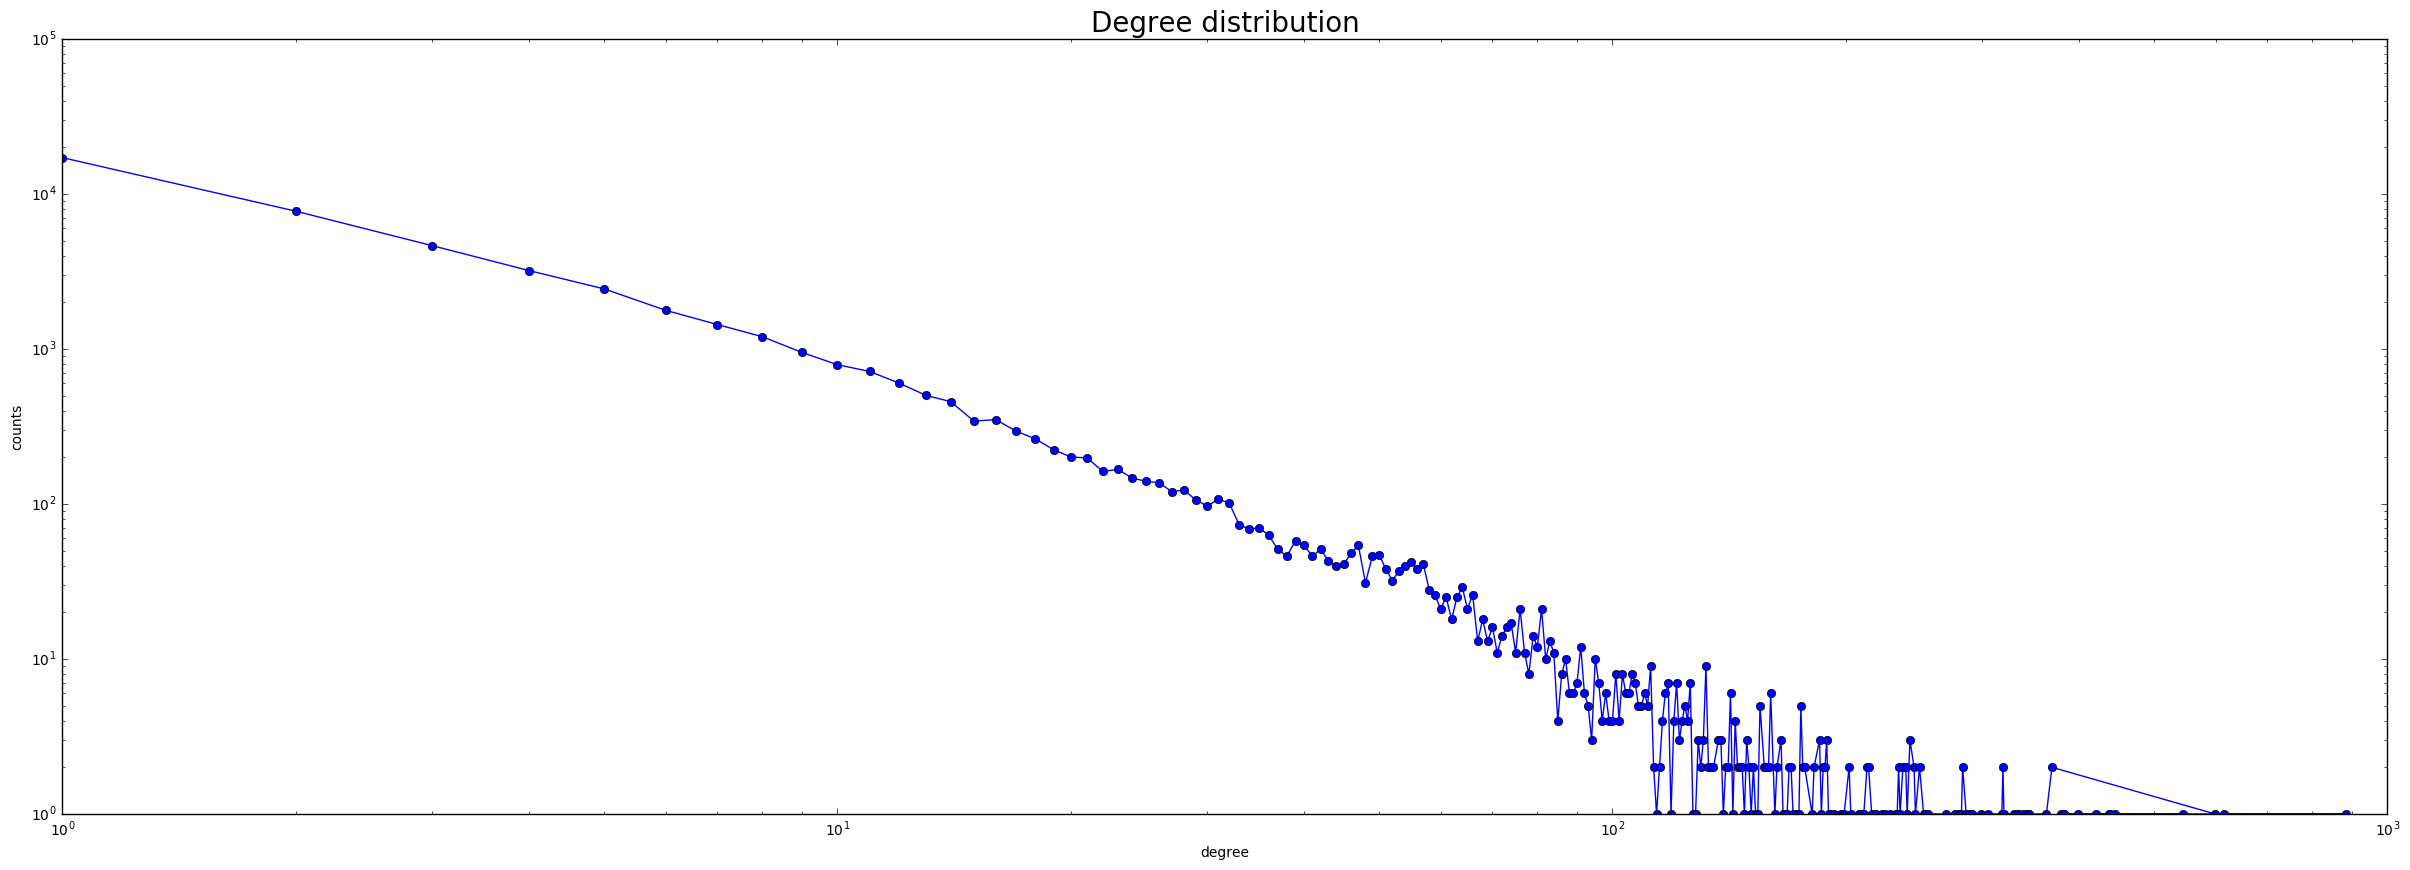

In [100]:
# degree dist
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams["axes.titlesize"] = 20
plt.loglog(list(hist.keys()), list(hist.values()),'b-',marker='o')
plt.title("Degree distribution")
plt.ylabel("counts")
plt.xlabel("degree")
plt.show()

In [108]:
hist_frac = {}
for d in hist.keys():
    hist_frac[d] = hist[d] / size

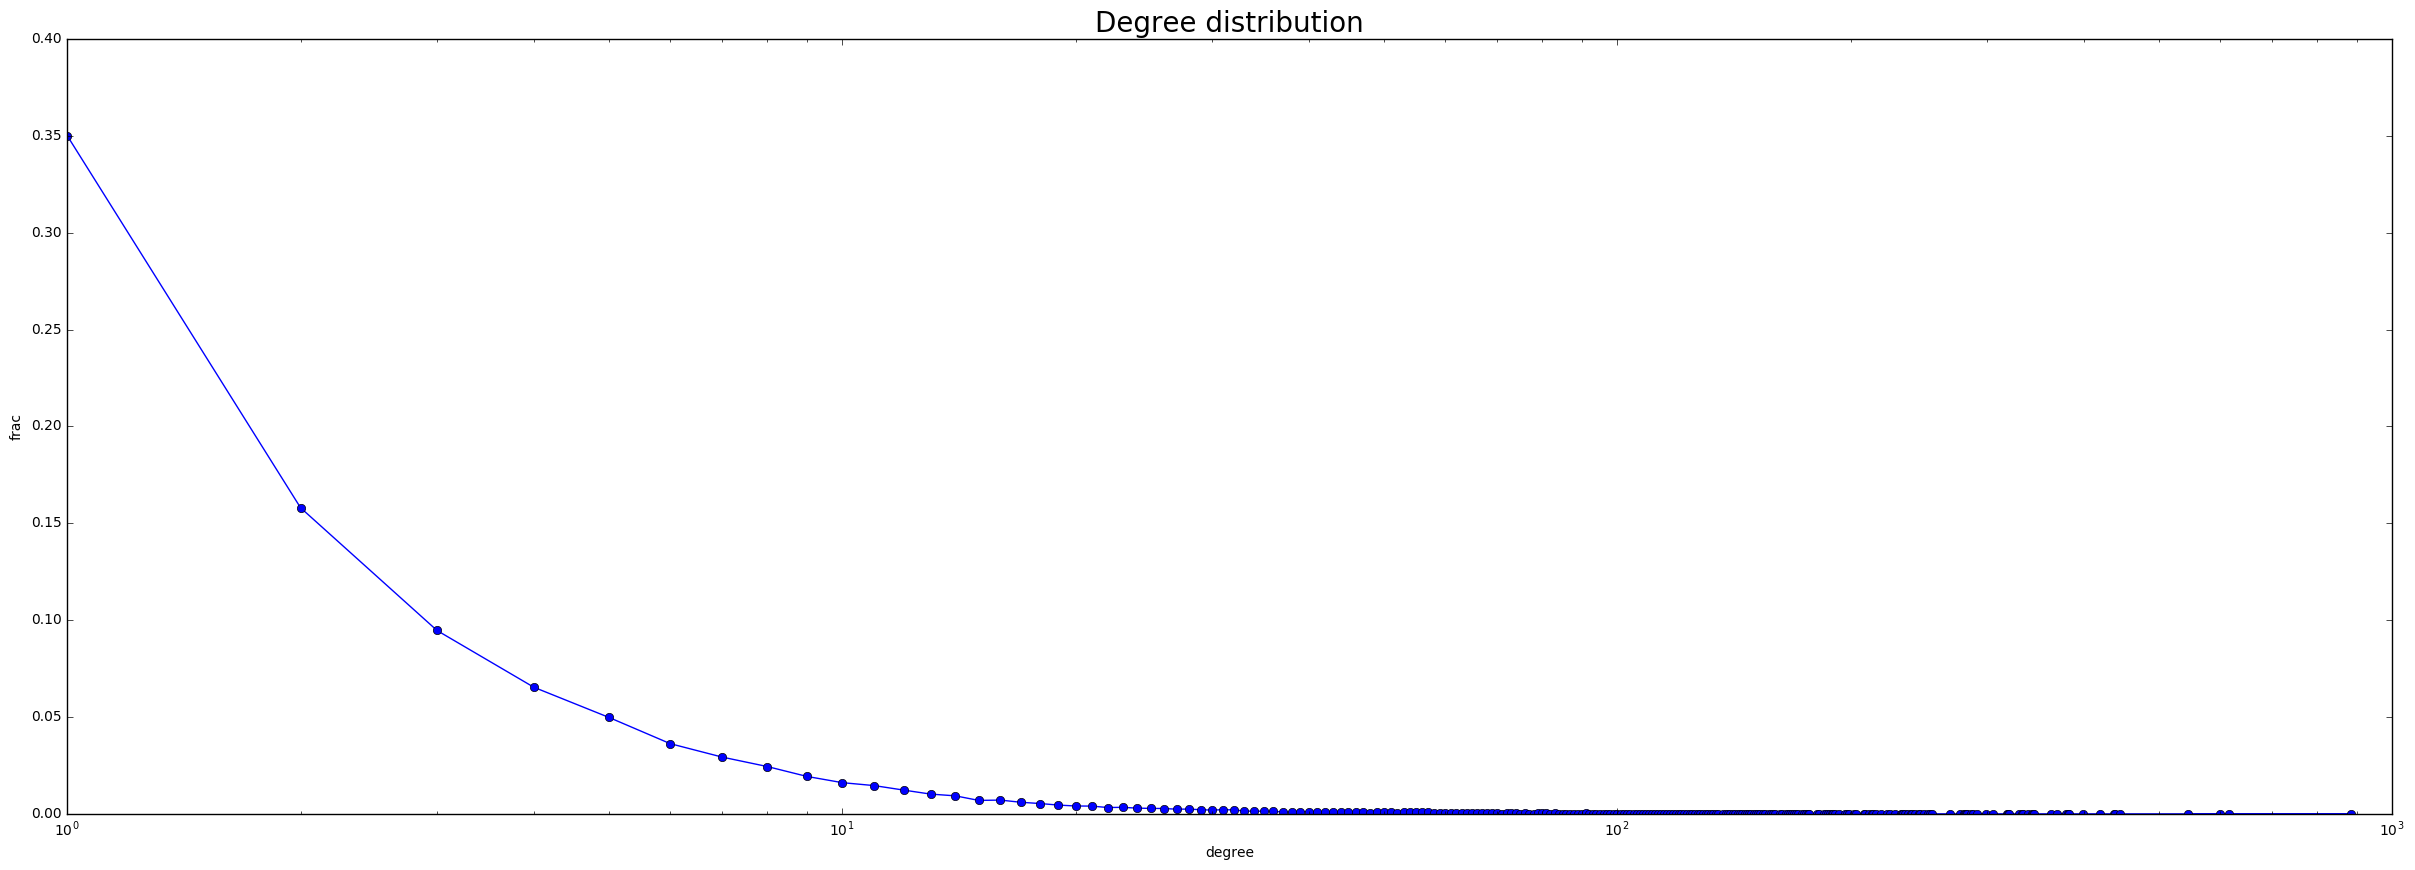

In [109]:
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams["axes.titlesize"] = 20
plt.semilogx(list(hist_frac.keys()), list(hist_frac.values()),'b-',marker='o')
plt.title("Degree distribution")
plt.ylabel("frac")
plt.xlabel("degree")
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (30,30)
plt.rcParams["axes.titlesize"] = 50
nx.draw(G, with_labels=False, node_size=1, node_color='b', width=0.1)